In [13]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split


In [14]:
def wrangle(datafile):
    
    #read csv
    df = pd.read_csv(datafile)

    #split the single column to twelve
    df[
        [
            "fixed acidity", "volatile acidity", "citric acid","residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"
        ]
    ] = df[
        'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'
    ].str.split(';', expand=True).astype(float)
    
    #drop original column
    df.drop(columns ='fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"', inplace=True)



    return df

In [15]:
#read csv and check first rows
df = wrangle('winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [16]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [17]:
def boxplot(data):
    cols = data.columns #het column names

    for col in cols:
        plt.figure(figsize=(8, 2))
        data[col].plot(kind='box', vert=False)#boxplot
        plt.xlabel(col)#x-axis
        plt.title(f"Boxplot of {col}")#title plot
        plt.grid(True, linestyle='--', alpha=0.5)  #Add grid
        plt.show()
    return None


<Axes: >

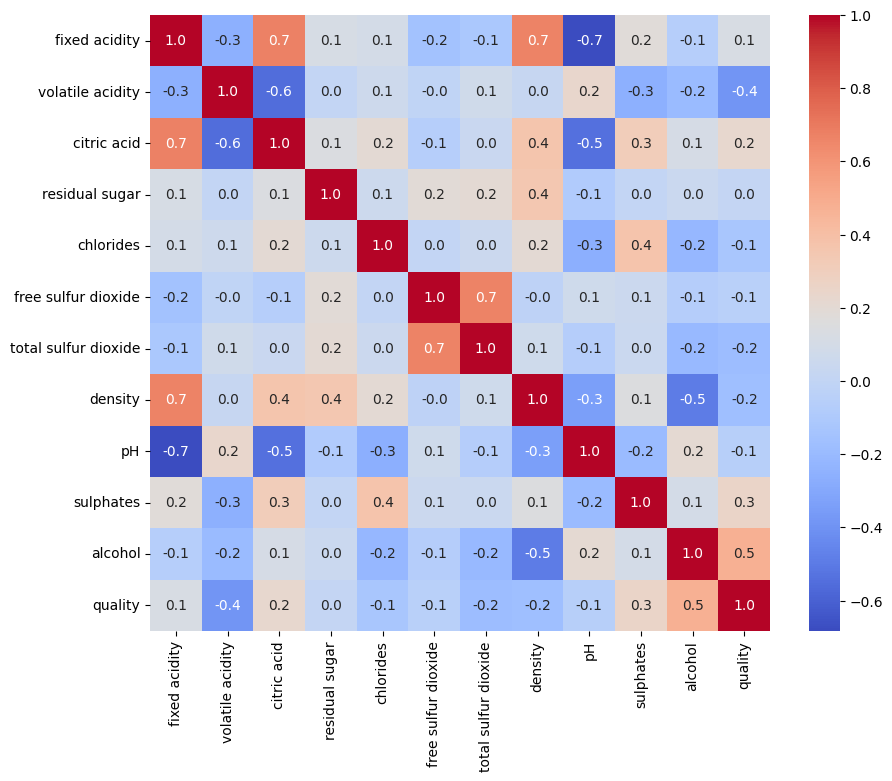

In [28]:
plt.figure(figsize=(10, 8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".1f")
